Kiet Nguyen

ID: 001601720

Email: kngu179@wgu.edu

### A. Purpose of Analysis

#### *A1. Research Question.*

Which independent variables had the most significant impact on customers' `MonthlyCharge`?

#### *A2. Objectives*

The objective of the analysis was to identify which independent variables significantly affected `MonthlyCharge`. Customers who were price sensitive would be more likely to churn if their monthly payments were too high. By determining which variables influenced `MonthlyCharge`, stakeholders could run various marketing campaigns to reduce cost for customers. This analysis could also lead to a better understanding of how the dependent variable changes based on the independent variables.

### B. Multiple Regression Description

#### *B1. Summarize Assumptions*

To perform multiple linear regression, five assumptions must be met (Bobbitt, 2021b):

1. Linear relationship between independent and dependent variable.

2. Independent variables are not highly correlated with each other.

3. Observations are independent.

4. Residuals have constant variance.

5. Residuals are normally distributed.

#### *B2. Tool Benefits*

I chose Python for this project because it is a flexible and powerful programming language. The syntax was also easy to read. On top of that, Python had a great ecosystem of libraries that made data analysis tasks much easier (Rane, 2021). The libraries used in this project were:

- `NumPy`: high-performance numerical computation.
- `Pandas`: fats and flexible dataframes.
- `Matplotlib` and `Seaborn`: data visualizations.
- `Statsmodels`: classes and functions for different statistical models.

The environment for this project was Conda, an open-source package manager and environment management system.

#### *B3. Multiple Regression Justification*

Multiple linear regression (MLR) could explain the relationship between multiple independent variables against one dependent variable (Bevans, 2020). This statistical technique could provide a more accurate representation of exactly how the dependent variable changes through a linear model. I wanted to use MLR to find out which independent variables are most significant to the dependent variable. By creating a linear regression model based on these variables, I could adjust the independent variables to see how they affect `MonthlyCharge`.

### C. Data Preparation Process

#### *C1. Preparation Goals*

The goals of data preparation included:

- Learn about the dataset and its variables.
- Explore measures of central tendency (mean, median, and mode).
- Check for missing data and handle them as necessary.
- Visualize data through univariate and bivariate plots.
- Remove highly correlated columns for MLR.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

churn = pd.read_csv('churn_clean.csv')
churn_cp = churn.copy(deep=True)

In [34]:
churn_cp.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


#### *C2. Summary Statistics*

The original dataset contained 10,000 rows and 50 columns. 23 columns were dropped from the dataset because they were not relevant to the MLR. The first twelve dropped columns were customer demographic data: `CaseOrder`, `Customer_id`, `Interaction`, `UID`, `City`, `State`, `County`, `Zip`, `Lat`, `Lng`, `Area`, `TimeZone`, `Job`, `Marital`, and `PaymentMethod`. Each of these demographic columns contained multiple unique categorical values that would generate too many dummy variables. The last eight dropped columns were survey responses, `Item1` through `Item8`, that were not significant to the target dependent variable.

The prepared dataset contained 26 independent variables and one dependent variable. The target dependent variable is `MonthlyCharge`, the amount charged to the customer monthly. The mean of this variable is 172.62 with a standard deviation of 42.94.

The eleven continuous independent variables are: `Population`, `Children`, `Age`, `Income`, `Outage_sec_perweek`, `Email`, `Contacts`, `Yearly_equip_failure`, `Tenure`, `MonthlyCharge`, and `Bandwidth_GB_Year`.

The sixteen categorical independent variables are: `Gender`, `Churn`, `Techie`, `Contract`, `Port_modem`, `Tablet`, `InternetService`, `Phone`, `Multiple`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, and `PaperlessBilling`.

In [35]:
churn_cp['MonthlyCharge'].describe()

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

In [36]:
# Drop customer demographic and survey columns that are not important to the regression analysis
churn_cp.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Area', 'TimeZone', 'Job', 'Marital', 'PaymentMethod', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis=1, inplace=True)

churn_cp.head()

,Population,Children,Age,Income,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,38,0,68,28561.99,Male,No,7.978323,10,0,1,...,Yes,Yes,No,No,No,Yes,Yes,6.795513,172.455519,904.536110
1,10446,1,27,21704.77,Female,Yes,11.699080,12,0,1,...,Yes,No,No,No,Yes,Yes,Yes,1.156681,242.632554,800.982766
2,3735,4,50,9609.57,Female,No,10.752800,9,0,1,...,No,No,No,No,No,Yes,Yes,15.754144,159.947583,2054.706961
3,13863,1,48,18925.23,Male,No,14.913540,15,2,0,...,Yes,No,No,No,Yes,No,Yes,17.087227,119.956840,2164.579412
4,11352,0,83,40074.19,Male,Yes,8.147417,16,2,1,...,No,No,No,Yes,Yes,No,No,1.670972,149.948316,271.493436


In [37]:
# Check statistics of continuous variables
churn_cp.describe()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550
std,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852
min,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715
25%,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370
max,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530


In [38]:
# Check statistics of categorical variable
churn_cp.describe(include=object)

,Gender,Churn,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,3,2,2,3,2,2,3,2,2,2,2,2,2,2,2,2
top,Female,No,No,Month-to-month,No,No,Fiber Optic,Yes,No,No,No,No,No,No,No,Yes
freq,5025,7350,8321,5456,5166,7009,4408,9067,5392,6424,5494,5614,6250,5071,5110,5882


#### *C3. Preparation Steps*

The steps used to prepare the data are:

1. Get an overview of the imported data.
2. Drop columns unnecessary for the MLR.
3. Check statistics of continuous and categorical variables.
4. Check for any duplicate or missing values.
5. Plot univariate and bivariate plots.
6. Encode categorical variables into numerical values.
7. Run a heatmap and drop highly correlated columns.
8. Calculate VIF and drop columns with VIF > 5.

In [39]:
# Check if there is any duplicates
churn_cp.duplicated().any()

False

In [40]:
# Check if there is any missing values
churn_cp.isnull().values.any()

False

#### *C4. Generate Visualizations*

**Univariate Plots**

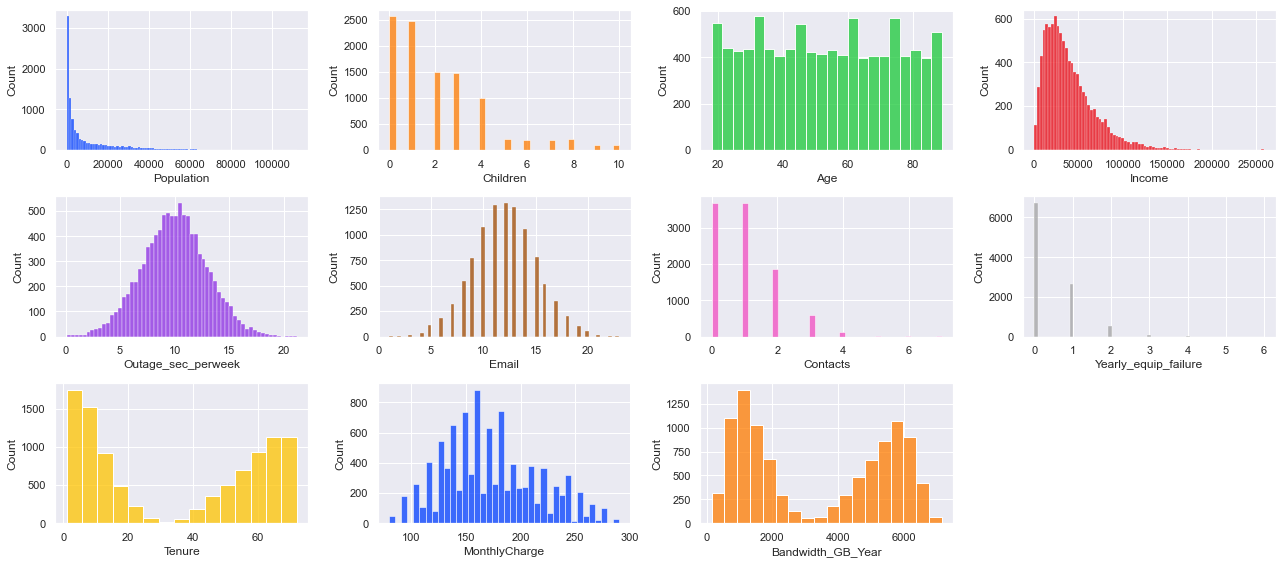

In [41]:
# Generate histograms for continuous columns
continuous = churn_cp.select_dtypes(include='number').columns.tolist()

fig, axes = plt.subplots(3, 4, figsize=(18, 8))
palette1 = sns.color_palette('bright')
sns.set_theme()

# Adapted from seaborn documentation (Waskom, 2022)
# https://seaborn.pydata.org/tutorial/color_palettes.html
x = 0
y = 0
color = 0
for col in continuous:
    if color == len(palette1) - 1:
        color = 0
    if y == 4:
        x += 1
        y = 0
    sns.histplot(ax=axes[x, y], data=churn_cp[col], color=palette1[color])
    color += 1
    y += 1

# Delete empty subplot
fig.delaxes(axes[2, 3])
plt.tight_layout()
plt.show()

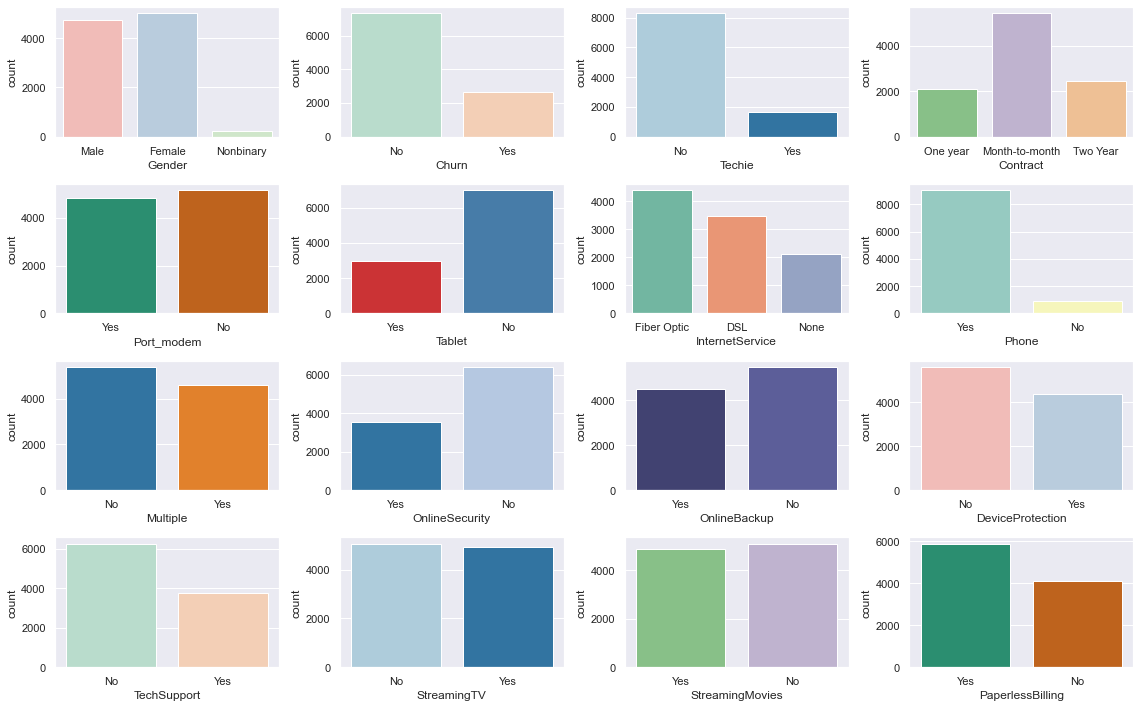

In [42]:
# Generate barplots for categorical columns
categorical = churn_cp.select_dtypes(include='object').columns.tolist()

fig, axes = plt.subplots(4, 4, figsize=(16, 10))
palettes = ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c']

x = 0
y = 0
color = 0
for col in categorical:
    if color == len(palettes) - 1:
        color = 0
    if y == 4:
        x += 1
        y = 0
    sns.countplot(ax=axes[x, y], x=col, data=churn_cp, palette=sns.color_palette(f'{palettes[color]}'))
    color += 1
    y += 1

plt.tight_layout()
plt.show()

**Bivariate Plots**

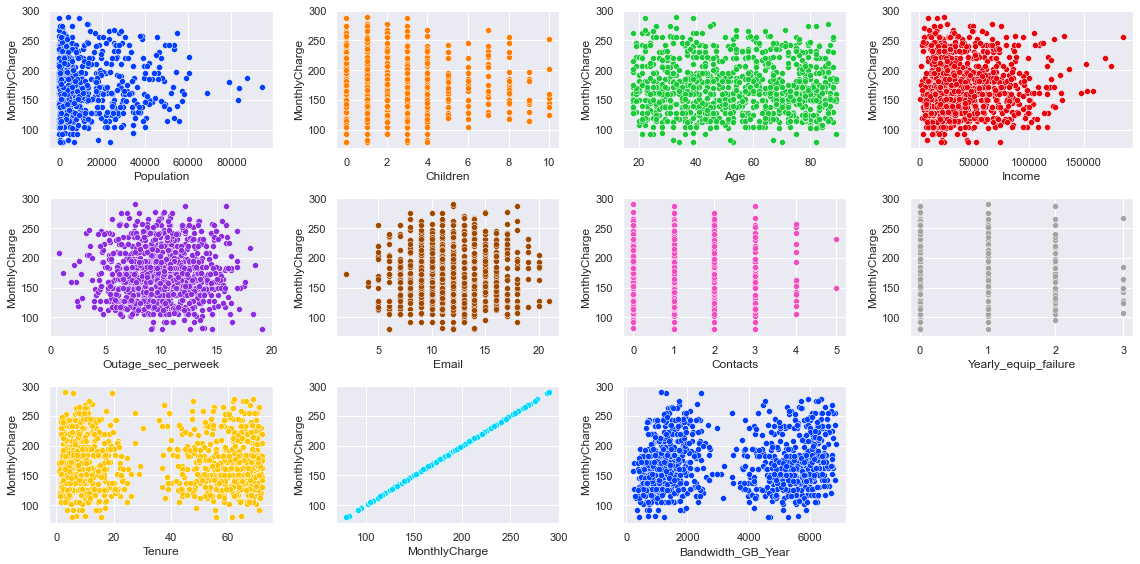

In [43]:
# Generate scatterplots for continuous columns against MonthlyCharge
fig, axes = plt.subplots(3, 4, figsize=(16, 8))

x = 0
y = 0
color = 0
depend_samp = churn_cp['MonthlyCharge'].sample(1000, random_state=123)
for col in continuous:
    if color == len(palette1):
        color = 0
    if y == 4:
        x += 1
        y = 0
    col_samp = churn_cp[col].sample(1000, random_state=123)
    sns.scatterplot(ax=axes[x, y], x=col_samp, y=depend_samp, color=palette1[color])
    y += 1
    color += 1

# Delete empty subplot
fig.delaxes(axes[2, 3])
plt.tight_layout()
plt.show()

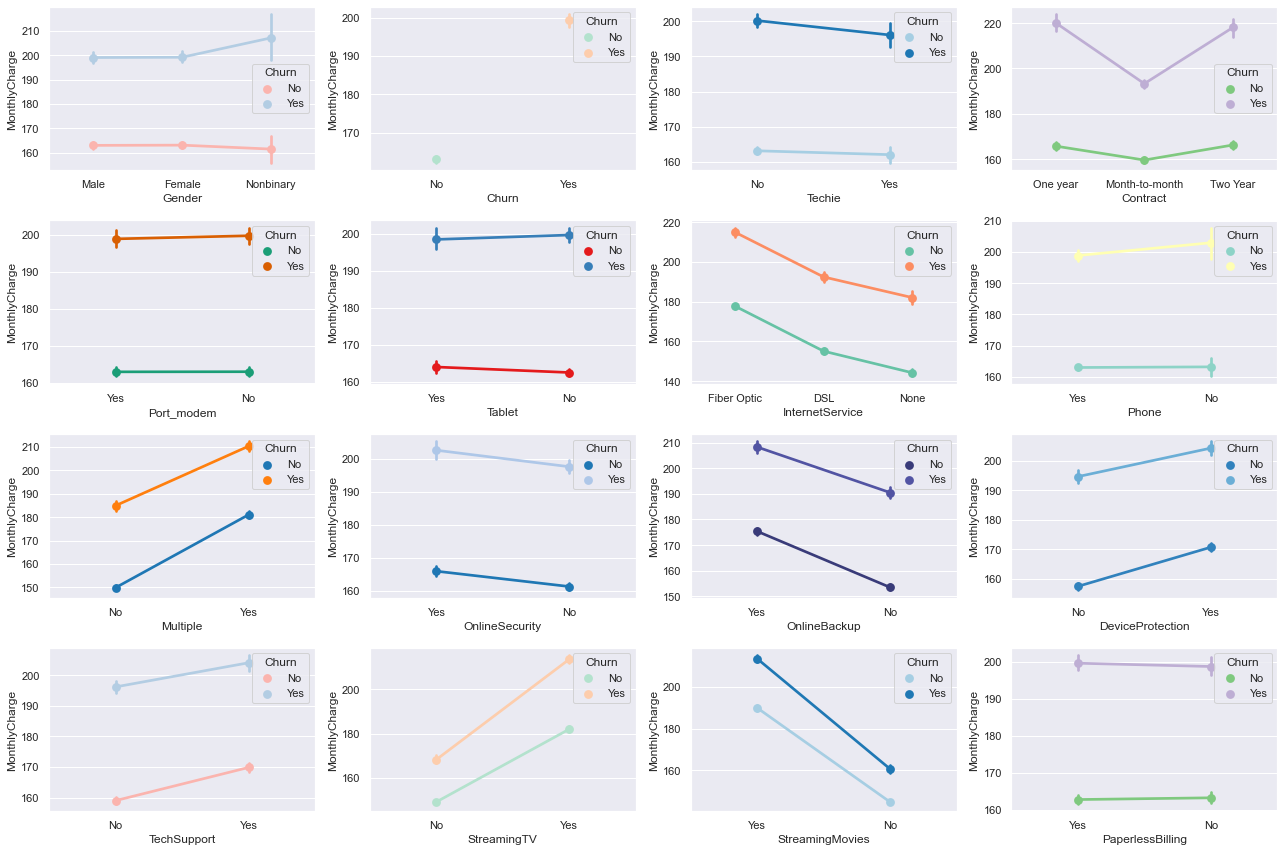

In [44]:
# Generate pointplots for categorical columns against MonthlyCharge with hue Churn
fig, axes = plt.subplots(4, 4, figsize=(18, 12))
colors = ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c']

x = 0
y = 0
color = 0
for col in categorical:
    if color == len(colors):
        color = 0
    if y == 4:
        x += 1
        y = 0
    sns.pointplot(ax=axes[x, y], x=col, y='MonthlyCharge', hue='Churn', data=churn_cp, palette=sns.color_palette(f'{colors[color]}'))
    y += 1
    color += 1

plt.tight_layout()
plt.show()

In [45]:
# Convert categorical columns into dummy variables
churn_dmy = pd.get_dummies(churn_cp, drop_first=True)

# Replace space in column names with underscore
churn_dmy.columns = churn_dmy.columns.str.replace(' ', '_')

churn_dmy.describe()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,...,InternetService_None,Phone_Yes,Multiple_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes
count,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,...,0.212900,0.906700,0.460800,0.357600,0.450600,0.438600,0.375000,0.492900,0.489000,0.588200
std,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,...,0.409378,0.290867,0.498486,0.479317,0.497579,0.496241,0.484147,0.499975,0.499904,0.492184
min,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


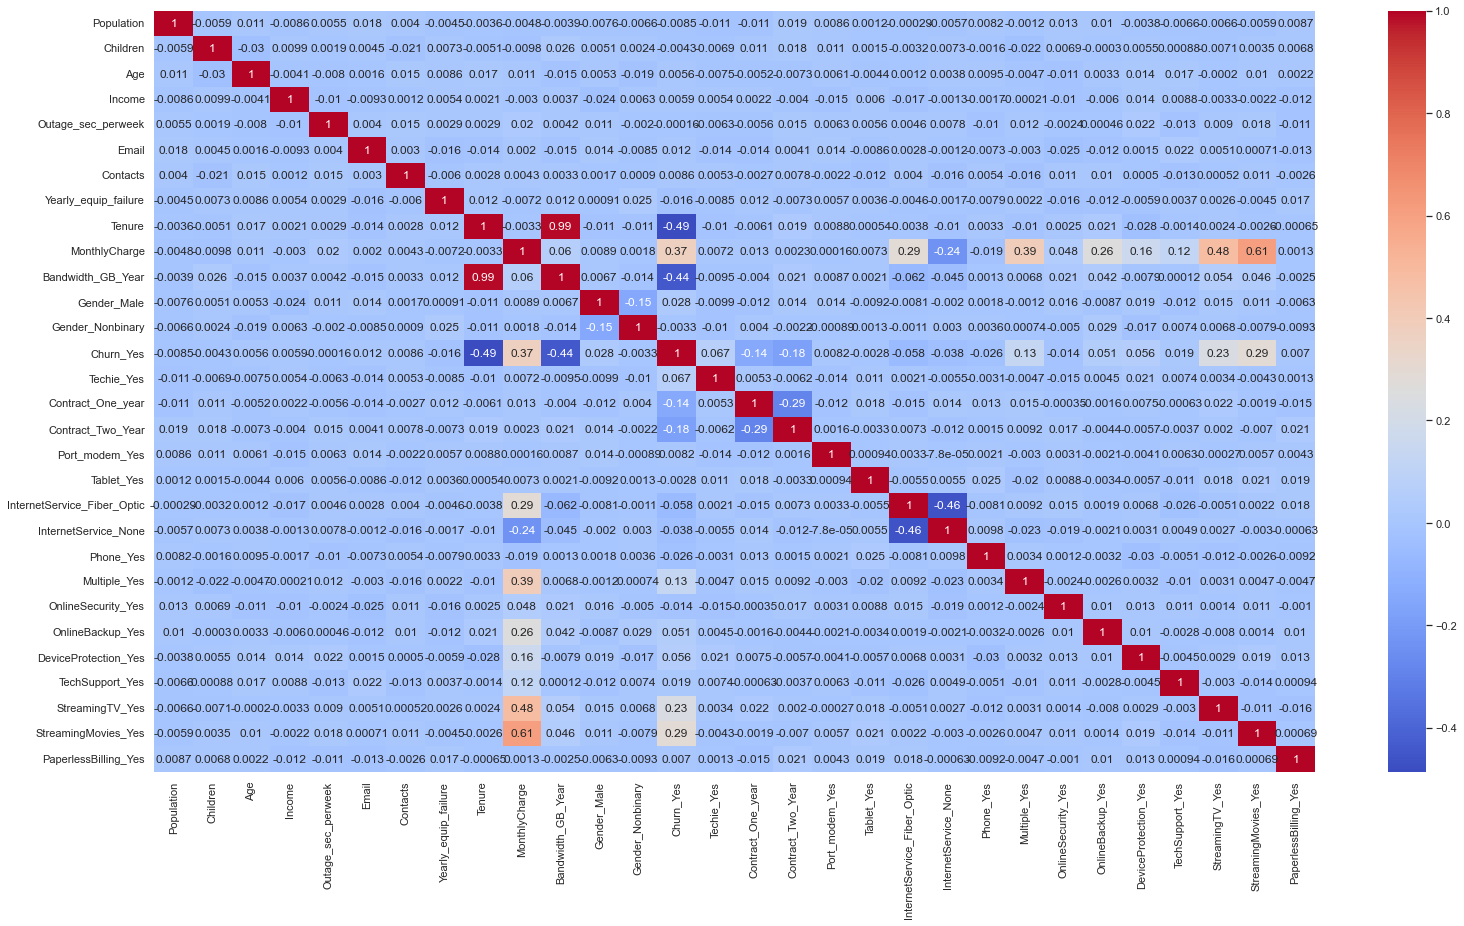

In [46]:
# Run a correlation matrix
churn_corr = churn_dmy.corr()

# Plot a heatmap of the correlations
plt.figure(figsize=(26, 14))
sns.heatmap(churn_corr, annot=True, xticklabels=churn_corr.columns, yticklabels=churn_corr.columns, cmap='coolwarm')
plt.show()

In [47]:
# Drop highly correlated columns
churn_dmy.drop(['Bandwidth_GB_Year', 'Tenure'], axis=1, inplace=True)

churn_dmy.head()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,MonthlyCharge,Gender_Male,...,InternetService_None,Phone_Yes,Multiple_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes
0,38,0,68,28561.99,7.978323,10,0,1,172.455519,1,...,0,1,0,1,1,0,0,0,1,1
1,10446,1,27,21704.77,11.699080,12,0,1,242.632554,0,...,0,1,1,1,0,0,0,1,1,1
2,3735,4,50,9609.57,10.752800,9,0,1,159.947583,0,...,0,1,1,0,0,0,0,0,1,1
3,13863,1,48,18925.23,14.913540,15,2,0,119.956840,1,...,0,1,0,1,0,0,0,1,0,1
4,11352,0,83,40074.19,8.147417,16,2,1,149.948316,1,...,0,0,0,0,0,0,1,1,0,0


In [48]:
# Adapted from Detecting Multicollinearity with VIF (GeeksforGeeks, 2020)
# https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

# Create independent variables set
X = churn_dmy.drop('MonthlyCharge', axis=1)

# VIF dataframe
vif = pd.DataFrame()
vif['Variables'] = X.columns

# Calculating VIF for each variable
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif

,Variables,VIF
0,Population,1.452552
1,Children,1.919980
2,Age,6.799319
3,Income,2.881564
4,Outage_sec_perweek,10.106537
5,Email,12.448311
6,Contacts,1.988874
7,Yearly_equip_failure,1.384885
8,Gender_Male,1.925507
9,Gender_Nonbinary,1.046806


In [49]:
# Get a list of variables with VIF > 5
high_vif = vif[vif['VIF'] > 5]
high_vif = high_vif['Variables'].tolist()

# Drop columns with high VIF
churn_dmy.drop(high_vif, axis=1, inplace=True)

churn_dmy.head()

,Population,Children,Income,Contacts,Yearly_equip_failure,MonthlyCharge,Gender_Male,Gender_Nonbinary,Churn_Yes,Techie_Yes,...,InternetService_Fiber_Optic,InternetService_None,Multiple_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes
0,38,0,28561.99,0,1,172.455519,1,0,0,0,...,1,0,0,1,1,0,0,0,1,1
1,10446,1,21704.77,0,1,242.632554,0,0,1,1,...,1,0,1,1,0,0,0,1,1,1
2,3735,4,9609.57,0,1,159.947583,0,0,0,1,...,0,0,1,0,0,0,0,0,1,1
3,13863,1,18925.23,2,0,119.956840,1,0,0,1,...,0,0,0,1,0,0,0,1,0,1
4,11352,0,40074.19,2,1,149.948316,1,0,1,0,...,1,0,0,0,0,0,1,1,0,0


#### *C5. Copy of Prepared Data*

In [50]:
# Create a copy of the prepared data
churn_dmy.to_csv('churn_prepare_task_1.csv', index=False)

### D. Compare Initial and Reduced Models

#### *D1. Construct Initial Model*

In [51]:
Y = churn_dmy['MonthlyCharge']
X = churn_dmy.drop('MonthlyCharge', axis=1)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                 1.006e+04
Date:                Thu, 28 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:24:52   Log-Likelihood:                -35859.
No. Observations:               10000   AIC:                         7.177e+04
Df Residuals:                    9976   BIC:                         7.194e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [52]:
# Residuals of the initial model
model.resid

0       -8.374701
1        7.842365
2       -8.603571
3       -8.950703
4       -9.891661
          ...    
9995     9.738315
9996    -8.382081
9997     8.484229
9998    10.235932
9999    -7.420766
Length: 10000, dtype: float64

#### *D2. Variable Selection Procedure*

In [53]:
# Get a list of variables with p > 0.05
high_p = []
for col in churn_dmy.columns:
    if col == 'MonthlyCharge':
        pass
    else:
        p_val = model.pvalues[col]
        if p_val > 0.05:
            print(f'{col}: {p_val:.2f}')
            high_p.append(col)

Population: 0.86
Children: 0.88
Income: 0.29
Contacts: 0.60
Yearly_equip_failure: 0.47
Gender_Male: 0.10
Gender_Nonbinary: 0.16
Techie_Yes: 0.31
Port_modem_Yes: 0.19
Tablet_Yes: 0.36
PaperlessBilling_Yes: 0.42


In [54]:
# Perform backward selection by dropping columns with high p-values
churn_dmy.drop(high_p, axis=1, inplace=True)

churn_dmy.head()

,MonthlyCharge,Churn_Yes,Contract_One_year,Contract_Two_Year,InternetService_Fiber_Optic,InternetService_None,Multiple_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
0,172.455519,0,1,0,1,0,0,1,1,0,0,0,1
1,242.632554,1,0,0,1,0,1,1,0,0,0,1,1
2,159.947583,0,0,1,0,0,1,0,0,0,0,0,1
3,119.956840,0,0,1,0,0,0,1,0,0,0,1,0
4,149.948316,1,0,0,1,0,0,0,0,0,1,1,0


In [55]:
# Drop variables that have coefficients < 3
churn_dmy.drop(['Churn_Yes', 'Contract_One_year', 'Contract_Two_Year', 'OnlineSecurity_Yes'], axis=1, inplace=True)

#### *D3. Reduced Regression Model*

In [56]:
Y = churn_dmy['MonthlyCharge']
X = churn_dmy.drop('MonthlyCharge', axis=1)

X = sm.add_constant(X)
reduced_model = sm.OLS(Y, X).fit()
print(reduced_model.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                 2.793e+04
Date:                Thu, 28 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:24:52   Log-Likelihood:                -36031.
No. Observations:               10000   AIC:                         7.208e+04
Df Residuals:                    9991   BIC:                         7.214e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [57]:
# Residuals of the reduced model
reduced_model.resid

0       -7.143755
1       10.842737
2       -9.795579
3       -7.037777
4       -9.496975
          ...    
9995     7.436309
9996    -7.108647
9997    10.128885
9998     8.242267
9999    -7.263100
Length: 10000, dtype: float64

### E. Analyze Dataset

#### *E1. Explain Analysis Process*

**Variable Selection Logic**

The process of backward selection removed the variables with high p-values in the initial model. The stopping rule is the p-value threshold of 0.05 (JMP, 2019). Another factor to consider with these variables was that their coefficients were extremely small. Take `Population` in the initial model for example, the p-value of this variable was 0.857 and its coefficient was 1.089e-06. Removing this variable had minimal effect on the model. Other variables with high p-value also tend to have coefficients that were lower than +-1. These variables do not significantly affect the accuracy of the model.

**Model Evaluation Metric**

In [58]:
# Check values of R-squared
initial_r2 = model.rsquared_adj
reduced_r2 = reduced_model.rsquared_adj

print(f'Adjusted R-squared:\n- Initial: {initial_r2:.3f}\n- Reduced: {reduced_r2:.3f}')

Adjusted R-squared:
- Initial: 0.959
- Reduced: 0.957


The first metric to look at is the Adjusted R-squared. This score is a measure of how much variation in the dependent variable is explained by only the independent variables that actually affect the dependent variable (Glen, 2021). The score on the reduced model was 0.957 while the initial model was 0.959. That was a minimal loss in explained variation despite reducing the number of independent variables from 25 to 8.

In [59]:
# Check values of RMSE
initial_rmse = np.sqrt(model.mse_resid)
reduced_rmse = np.sqrt(reduced_model.mse_resid)

print(f'RMSE:\n- Initial: {initial_rmse:.2f}\n- Reduced: {reduced_rmse:.2f}')

RMSE:
- Initial: 8.74
- Reduced: 8.89


The second metric is the Root Mean Square Error (RMSE). This value is the measure of accuracy for the regression model. It is based on the average distance between the observed and predicted data values (Bobbit, 2021a). The initial model RMSE was 8.74 while the reduced model was 8.88. The slight increase in RMSE was due to the reduction of predictor variables. Overall it should not affect the accuracy of the reduced model.

**Residual Plot**

The scale-location plot below showed the square root of the standardized residuals versus the fitted values. This plot indicates whether the size of the residuals get bigger or smaller (Broeck, 2022). Since the residuals appear to be randomly scattered, there did not seem to be a problem with heteroscedasticity.

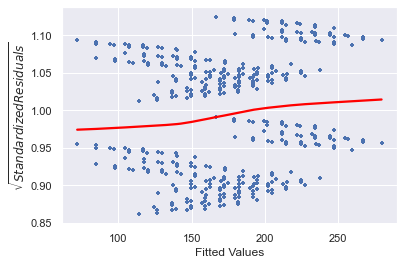

In [60]:
# Adapted from Assessing Model Fit (Broeck, 2022)
# https://app.datacamp.com/learn/courses/introduction-to-regression-with-statsmodels-in-python

# Create a scale-location plot
reduced_model_norm_resid = reduced_model.get_influence().resid_studentized_internal
reduced_model_norm_resid_sqrt = np.sqrt(np.abs(reduced_model_norm_resid))
sns.regplot(x=reduced_model.fittedvalues, y=reduced_model_norm_resid_sqrt, lowess=True, marker='+', line_kws={'color': 'red'}, scatter_kws={'s': 15})

plt.xlabel('Fitted Values')
sqrt_sym = r"$\sqrt{Standardized Residuals}$"
plt.ylabel(f'{sqrt_sym}')
plt.show()

#### *E2. Analysis Output*

The output and calculations of both the model and the reduced model are found in sections D1 through D3. The initial model's residuals can be found at the end of section D1. The reduced model's residuals can be found at the end of section D3.

The reduced model's predictions are below:

In [61]:
predictions = reduced_model.get_prediction()
predictions.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,179.599274,0.246765,179.115564,180.082984,162.172045,197.026503
1,231.789817,0.245958,231.307691,232.271944,214.362632,249.217003
2,169.743162,0.255481,169.242368,170.243956,152.315450,187.170873
3,126.994617,0.250331,126.503918,127.485316,109.567192,144.422042
4,159.445291,0.256945,158.941628,159.948954,142.017497,176.873086
...,...,...,...,...,...,...
9995,152.543091,0.269429,152.014957,153.071226,135.114573,169.971610
9996,214.589747,0.258382,214.083266,215.096228,197.161871,232.017623
9997,159.845215,0.250246,159.354681,160.335748,142.417795,177.272634
9998,244.381733,0.265728,243.860853,244.902614,226.953433,261.810034


#### *E3. Code for MLR*

The code that ran the MLR could be found in section D1 for the initial model and D3 for the reduced model.

### F. Summarize Findings

#### *F1. Results of Analysis*

**Regression Equation**

In [62]:
# Lists of variables and their coefficients
cols = churn_dmy.columns.tolist()
coefs = reduced_model.params.tolist()

# Create equation string for the reduced model
equation = f'y = {coefs[0]:.2f}'
for col, coef in zip(cols[1:], coefs[1:]):
    equation += f' + ({coef:.2f} * {col})'

print(f'Regression Equation:\n{equation}')

Regression Equation:
y = 84.81 + (19.86 * InternetService_Fiber_Optic) + (-12.93 * InternetService_None) + (32.59 * Multiple_Yes) + (22.59 * OnlineBackup_Yes) + (12.56 * DeviceProtection_Yes) + (12.59 * TechSupport_Yes) + (42.19 * StreamingTV_Yes) + (52.35 * StreamingMovies_Yes)


**Interpretation of Coefficients**

The majority of the coefficients in the model are positive. This is in line with the fact that having additional services and add-ons cost more money. The only negative coefficient was not having an internet service. This makes sense because the highest coefficients were streaming movies, streaming TV, and having multiple lines. All of those high cost services required the internet.

**Model Significance**

All of the independent variables in the equation are statistically significant. This means that the relationships between these variables and `MonthlyCharge` are statistically significant. Changes in these independent variables are associated with changes in the dependent variable when applied to the population (Frost, 2021). At the same time, there could be other factors that could influence either the coefficients or the p-values of these variables. The original dataset contained many independent variables that were reduced for the analysis. This would be an important case where having domain expertise will help the analysis identify the important variables.

**Limitations of Analysis**

There were multiple limitations to this analysis. The first was mentioned above, where reducing too many variables could have affected the accuracy of the final result. The second was that creating dummy variables for the categorical columns could have created some redundancy. The data generated from these dummy variables could have created some bias in the model, leading to some inaccuracy. These dummy variables also made it difficult to plot residuals versus fitted values because their values were either zero or one, not continuous.

#### *F2. Recommendations*

Based on the model, the variables with the highest coefficients were streaming movies, streaming TV, and having multiple lines. Given that the mean `MonthlyCharge` was 172.62, customers who had all of mentioned additional services and add-ons would be paying significantly more than the average. This could lead to more churn for customers sensitive to high prices. To counteract this, stakeholders had multiple options:

1. Lowering the basic cost of service. This basic cost was the constant of 84.81, the price that customers paid without any of the additional variables involved. This constant alone is almost half of the mean monthly payment.
2. Lowering the costs of services and add-ons. The model indicated that having multiple lines and streaming services were expensive. Lowering the costs of these services could lead to better customer retention. The loss in profit could be made up by spreading it over the additional tenure of the customers.
3. Creating packages for customers who had these services together. Customers who had multiple services together would be less likely to leave if they are paying less by bundling these services together.

### G. Panopto Recording

Link: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=2cbfe92e-1314-4338-a99b-ae830088f19a

### H. Third-Party Code

Detecting multicollinearity with VIF - python. GeeksforGeeks. (2020, August 29). Retrieved April 23, 2022, from https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

Example of multiple linear regression in python. Data to Fish. (2021, May 17). Retrieved April 22, 2022, from https://datatofish.com/multiple-linear-regression-python/

Middleton, K. (2021). Lesson 7: Principal Component Analysis (PCA). Western Governors University. https://my.wgu.edu/courses/course/23720006/course-material

Waskom, M. (2022). Choosing color palettes. Choosing color palettes - seaborn 0.11.2 documentation. Retrieved April 25, 2022, from https://seaborn.pydata.org/tutorial/color_palettes.html

### I. References

Bevans, R. (2020, October 26). An introduction to multiple linear regression. Scribbr. Retrieved April 20, 2022, from https://www.scribbr.com/statistics/multiple-linear-regression/

Bobbitt, Z. (2021a, May 10). How to interpret root mean square error (RMSE). Statology. Retrieved April 24, 2022, from https://www.statology.org/how-to-interpret-rmse/

Broeck, M. V. den. (2022). Introduction to Regression with statsmodels in Python. DataCamp. Retrieved April 25, 2022, from https://app.datacamp.com/learn/courses/introduction-to-regression-with-statsmodels-in-python

Bobbitt, Z. (2021b, November 16). The five assumptions of multiple linear regression. Statology. Retrieved April 20, 2022, from https://www.statology.org/multiple-linear-regression-assumptions/

Frost, J. (2021). How to Interpret P-values and Coefficients in Regression Analysis. Statistics By Jim. Retrieved April 26, 2022, from https://statisticsbyjim.com/

Glen, S. (2021, June 7). Adjusted R2 / adjusted R-squared: What is it used for? Statistics How To. Retrieved April 24, 2022, from https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/adjusted-r2/

Rane, Z. (2021, August 19). 10 compelling reasons to learn Python for data science. Medium. Retrieved April 20, 2022, from https://towardsdatascience.com/10-compelling-reasons-to-learn-python-for-data-science-fa31160321cb#1faf

Variable selection in multiple regression. JMP. (2019, January 28). Retrieved April 24, 2022, from https://www.jmp.com/en_in/statistics-knowledge-portal/what-is-multiple-regression/variable-selection.html